In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Mean_temp_of_15_countries.xlsx")
df

,Country,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Badghis,13.46,12.48,12.24,13.26,12.37,13.01,13.37,12.92,13.33,13.06,12.11
1,Afghanistan,Baghlan,9.38,9.17,8.48,9.38,8.98,9.17,9.68,9.42,9.87,9.14,8.59
2,Afghanistan,Balkh,16.77,16.22,15.75,16.71,16.16,16.52,16.98,16.52,17.05,16.70,15.80
3,Afghanistan,Bamyan,5.64,5.33,4.66,5.59,5.19,5.38,5.96,5.64,6.11,5.41,4.77
4,Afghanistan,Farah,19.76,19.02,18.51,19.66,18.87,19.49,19.96,19.43,19.79,19.24,18.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,United States,Virginia,13.65,14.44,14.77,13.49,12.95,14.02,14.44,14.53,14.16,14.71,14.80
546,United States,Washington,8.62,7.78,8.61,8.76,9.41,10.07,9.64,8.55,9.17,8.31,9.13
547,United States,West Virginia,11.50,12.27,12.76,11.42,10.75,11.94,12.61,12.55,12.15,12.61,12.64
548,United States,Wisconsin,7.48,7.01,8.79,5.83,5.07,7.33,8.13,7.55,6.62,6.14,7.54


In [3]:
percent_missing = df.isnull().sum() * 100 / len(df) #finding percentage
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [4]:
print(missing_value_df)

        column_name  percent_missing
Country     Country              0.0
State         State              0.0
2010           2010              0.0
2011           2011              0.0
2012           2012              0.0
2013           2013              0.0
2014           2014              0.0
2015           2015              0.0
2016           2016              0.0
2017           2017              0.0
2018           2018              0.0
2019           2019              0.0
2020           2020              0.0


In [5]:
duplicate = df[df.duplicated()] #check for duplictes
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Country,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
168,Brazil,Name Unknown,24.53,24.51,24.52,24.54,24.54,24.55,24.54,24.52,24.52,24.52,24.52
169,Brazil,Name Unknown,24.53,24.51,24.52,24.54,24.54,24.55,24.54,24.52,24.52,24.52,24.52


In [6]:
df = df.drop(169) #eliminating the duplicates rows
df=df.drop(168)
df

,Country,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Badghis,13.46,12.48,12.24,13.26,12.37,13.01,13.37,12.92,13.33,13.06,12.11
1,Afghanistan,Baghlan,9.38,9.17,8.48,9.38,8.98,9.17,9.68,9.42,9.87,9.14,8.59
2,Afghanistan,Balkh,16.77,16.22,15.75,16.71,16.16,16.52,16.98,16.52,17.05,16.70,15.80
3,Afghanistan,Bamyan,5.64,5.33,4.66,5.59,5.19,5.38,5.96,5.64,6.11,5.41,4.77
4,Afghanistan,Farah,19.76,19.02,18.51,19.66,18.87,19.49,19.96,19.43,19.79,19.24,18.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,United States,Virginia,13.65,14.44,14.77,13.49,12.95,14.02,14.44,14.53,14.16,14.71,14.80
546,United States,Washington,8.62,7.78,8.61,8.76,9.41,10.07,9.64,8.55,9.17,8.31,9.13
547,United States,West Virginia,11.50,12.27,12.76,11.42,10.75,11.94,12.61,12.55,12.15,12.61,12.64
548,United States,Wisconsin,7.48,7.01,8.79,5.83,5.07,7.33,8.13,7.55,6.62,6.14,7.54


In [7]:

duplicate = df[df.duplicated()] #checking for duplicates after eliminating in dataframe
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Country,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [8]:
dc=df.isnull().values.any() #Checking fo nan values in whole dataframe
dc

False

<AxesSubplot:>

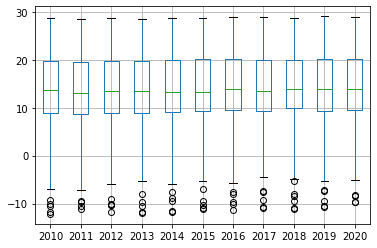

In [9]:
df.boxplot()

In [14]:
def find_quantile(value):
    c=(df[value].quantile(0.10))
    d=(df[value].quantile(0.90))
    a=[c,d]
    return a
    



In [15]:
def replace_outliers(value):
    d=find_quantile(value)
    df[value] = np.where(df[value] <d[0], d[0],df[value])
    df[value] = np.where(df[value] >d[1], d[1],df[value])
    print(df[value].skew())

0.30269073372166666
0.3349759457257476
0.3152367479027911
0.3442381852515942
0.32888970845363885
0.38569567397153565
0.31992267282454545
0.33861606057511107
0.23382968842510124
0.2871703438927715
0.34030612822441514


<AxesSubplot:>

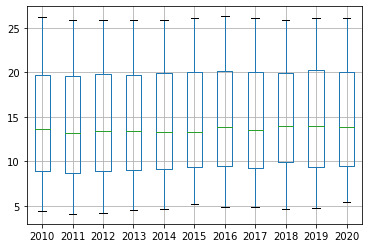

In [18]:
replace_outliers(2010)
replace_outliers(2011)
replace_outliers(2012)
replace_outliers(2013)
replace_outliers(2014)
replace_outliers(2015)
replace_outliers(2016)
replace_outliers(2017)
replace_outliers(2018)
replace_outliers(2019)
replace_outliers(2020)
df.boxplot()